# Assignment No.7


#### Use K-Medoids clustering to segment wholesale customers based on their annual spending on 
#### different product categories. Identify the optimal number of clusters to effectively group 
#### customers with similar purchasing behaviours. Dataset: Wholesale Customers Dataset (UCI). 

#### Name: Wavhal Prathmesh Navnath 
#### Roll No:23107137
#### Class :  TY-B

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [25]:
df = pd.read_csv("C:/Users/prath/Downloads/Wholesale customers data.csv")

In [26]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [43]:
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Cluster             0
dtype: int64

In [27]:
df = df.drop(columns=["Channel","Region"],axis=1)

In [28]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [29]:
x = df

## Outlier Detection using IQR

In [30]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

# Find outlier rows
outlier_condition = ((x< (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)
outliers = df[outlier_condition]

print(f"Number of outliers: {len(outliers)}")
print(outliers)

Number of outliers: 108
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
2     6353   8808     7684    2405              3516        7844
4    22615   5410     7198    3915              1777        5185
17    5876   6157     2933     839               370        4478
22   31276   1917     4469    9408              2381        4334
23   26373  36423    22019    5154              4337       16523
..     ...    ...      ...     ...               ...         ...
427  31012  16687     5429   15082               439        1163
431   8533   5506     5160   13486              1377        1498
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867

[108 rows x 6 columns]


### Robust Scaler 

In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x = scaler.fit_transform(x)                ### it uses the Median and IQR for the Outlierrs      Xscaled=  X−Median(X) / IQR(X)


In [32]:
## Standardization = feature scaling technique
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = scalar.fit_transform(x)

###  Determine optimal number of clusters using Silhouette Score

In [33]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

In [34]:
sil_scores = []
k_range = range(2, 11)                                                       # Try 2 to 10 clusters
for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam')
    labels = kmedoids.fit_predict(x)
    score = silhouette_score(x, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

k = 2, Silhouette Score = 0.408
k = 3, Silhouette Score = 0.322
k = 4, Silhouette Score = 0.251
k = 5, Silhouette Score = 0.239
k = 6, Silhouette Score = 0.246
k = 7, Silhouette Score = 0.231
k = 8, Silhouette Score = 0.235
k = 9, Silhouette Score = 0.229
k = 10, Silhouette Score = 0.240


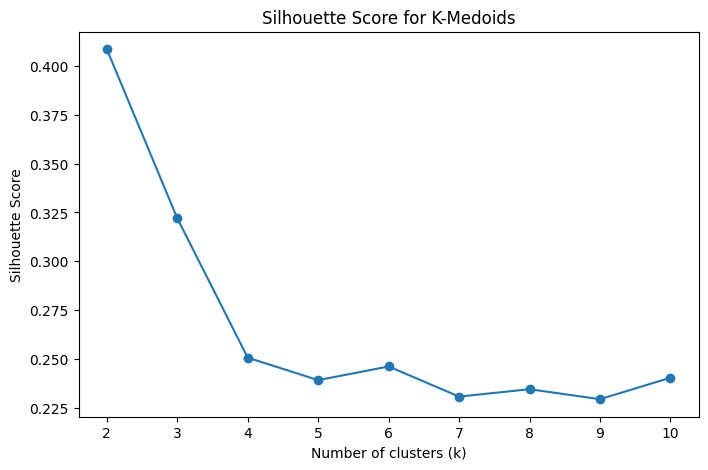

In [35]:
# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score for K-Medoids")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [36]:
## max value score is at K=2
kmedoids = KMedoids(n_clusters=2, random_state=42)
clusters = kmedoids.fit_predict(x)

In [37]:
df['Cluster'] = clusters

In [38]:
cluster_summary = df.groupby('Cluster')[df.columns].mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
                 Fresh          Milk       Grocery      Frozen  \
Cluster                                                         
0        11422.467836  10762.111111  15691.064327  2153.22807   
1        12367.617100   2639.539033   3031.189591  3655.94052   

         Detergents_Paper   Delicassen  Cluster  
Cluster                                          
0             6502.637427  2285.269006      0.0  
1              579.576208  1041.494424      1.0  


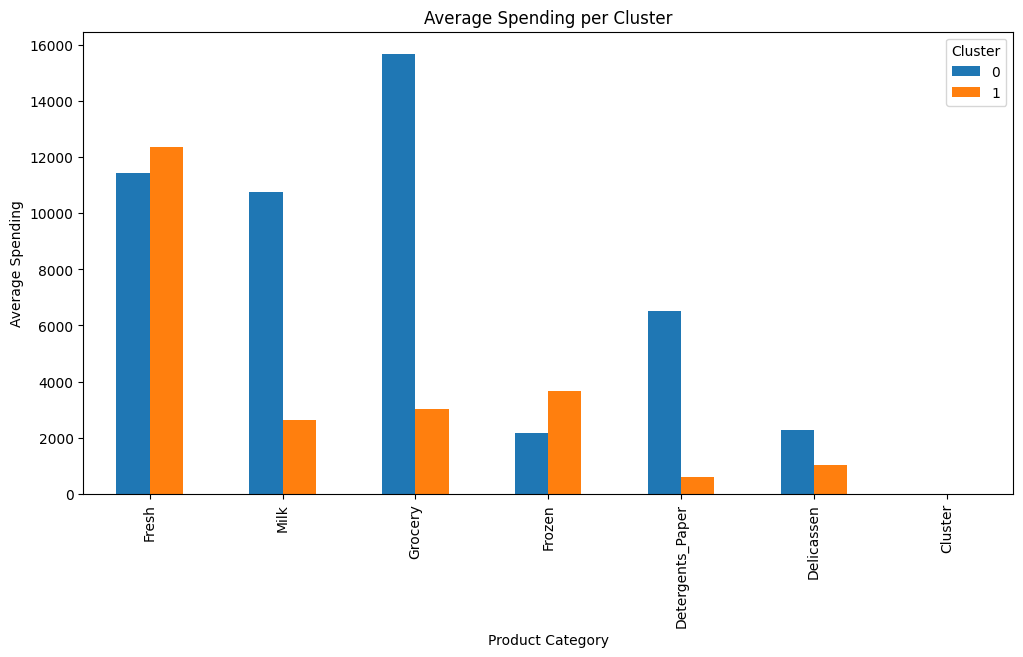

In [39]:
cluster_summary[df.columns].T.plot(kind='bar', figsize=(12,6))
plt.title("Average Spending per Cluster")
plt.xlabel("Product Category")
plt.ylabel("Average Spending")
plt.show()


### Evaluation

In [40]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(x, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.29290996355033305


## PCA to merge all 7 in 2 colmns and to visualize the Clusters

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

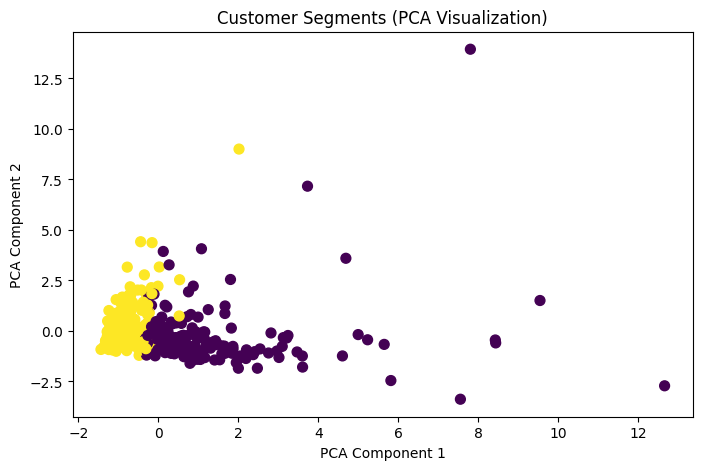

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()